딥러닝은 머신러닝의 알고리즘 중 하나다.

머신러닝에는 다양한 알고리즘들이 있다.

KNN, SVM, Random Forest 등등 정말 다양한 알고리즘들이 있는데 그 중 요즘 핫한 알고리즘이 딥러닝이다.

딥러닝은 여러 라이브러리가 있다. 요즘 뜨는 pytorch나 예전부터 강력한 파워를 가지고 있는 tensorflow, keras, theano 등이 있다.

그 중에서 keras를 사용한다. keras는 backend로 tensorflow, theano를 사용할 수 있는데

tensorflow보다 간편하게 쓸 수 있어서 딥러닝에 입문하는데 이만한게 없다.



머신러닝은 곧 ** 얼마나 정확한 예측선을 긋느냐 ** 가 관건이다. 예를 들어 폐암 생존을 판단한다고 가정하면

폐암에 걸린 사람들의 데이터를 쭉 나열하고 이 사람이 사망했는지, 사망을 안했는지를 나누는거다.

이 경계를 잘 긋는 것이 핵심. 이를 위해서 서포트 벡터 머신(SVM), 랜덤 포레스트(Randomforest) 등이 나온것

그리고 그 중 딥러닝도 포함되어 있는 것

그럼 뭐 본론으로 들어가기 전에 폐암환자들의 수술 후 생존율을 예측해보자.


In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

C:\Users\leesoojin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import matplotlib as mpl

import seaborn as sns

이 부분은 사용하지 않더라고 꼭 임포트 해주자

데이터 사이언스쪽에서 파이썬의 이 라이브러리들은 자주 사용되기 때문에 습관을 들어주시는게 좋다.

그리고 gpu와 관련한 셋팅을 합니다.

In [2]:
import keras.backend.tensorflow_backend as K
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [3]:
data = pd.read_csv('../dataset/ThoraricSurgery.csv', header=None)
print(data.shape)

(470, 18)


469개의 row와 18개의 속성으로 되어 있다.

In [4]:
print(data.head())

    0   1     2     3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
0  293   1  3.80  2.80   0   0   0   0   0   0  12   0   0   0   1   0  62   0
1    1   2  2.88  2.16   1   0   0   0   1   1  14   0   0   0   1   0  60   0
2    8   2  3.19  2.50   1   0   0   0   1   0  11   0   0   1   1   0  66   1
3   14   2  3.98  3.06   2   0   0   0   1   1  14   0   0   0   1   0  80   1
4   17   2  2.21  1.88   0   0   1   0   0   0  12   0   0   0   1   0  56   0


In [5]:
X = data.iloc[:, :17].values
y = data.iloc[:,17].values

print(X[:5])
print(y[:5])

[[293.     1.     3.8    2.8    0.     0.     0.     0.     0.     0.
   12.     0.     0.     0.     1.     0.    62.  ]
 [  1.     2.     2.88   2.16   1.     0.     0.     0.     1.     1.
   14.     0.     0.     0.     1.     0.    60.  ]
 [  8.     2.     3.19   2.5    1.     0.     0.     0.     1.     0.
   11.     0.     0.     1.     1.     0.    66.  ]
 [ 14.     2.     3.98   3.06   2.     0.     0.     0.     1.     1.
   14.     0.     0.     0.     1.     0.    80.  ]
 [ 17.     2.     2.21   1.88   0.     0.     1.     0.     0.     0.
   12.     0.     0.     0.     1.     0.    56.  ]]
[0 0 1 1 0]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

(376, 17)
(94, 17)


In [7]:
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
376/376 [==============================] - 0s 1ms/step - loss: 12.0437 - acc: 0.1941
Epoch 2/50
376/376 [==============================] - 0s 218us/step - loss: 2.2111 - acc: 0.7287
Epoch 3/50
376/376 [==============================] - 0s 223us/step - loss: 0.7025 - acc: 0.7819
Epoch 4/50
376/376 [==============================] - 0s 225us/step - loss: 0.6163 - acc: 0.7793
Epoch 5/50
376/376 [==============================] - 0s 247us/step - loss: 0.5690 - acc: 0.7766
Epoch 6/50
376/376 [==============================] - 0s 252us/step - loss: 0.5028 - acc: 0.8112
Epoch 7/50
376/376 [==============================] - 0s 231us/step - loss: 0.5378 - acc: 0.7846
Epoch 8/50
376/376 [==============================] - 0s 244us/step - loss: 0.4820 - acc: 0.8218
Epoch 9/50
376/376 [==============================] - 0s 244us/step - loss: 0.5420 - acc: 0.7952
Epoch 10/50
376/376 [==============================] - 0s 225us/step - loss: 0.5257 - acc: 0.8059
Epoch 11/50
376/376 [=========

In [10]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]) )

94/94 [==============================] - 0s 31us/step
정확도 : 0.9574


물론 제대로 된 모델은 아니다. 하지만 이렇게 학습을 시킬 수 있다는 것!

정확도가 1에 가까우면 100%라는 뜻. 이렇게 단 몇줄의 코드로 폐암 환자의 수술후 생존 여부를 예측할 수 있다.

여기서 보셔야 할 것은 데이터인데

17번째까지는 **속성(attribute)** 그리고 마지막 18번째는 **클래스(class) 혹은 라벨**이라고도 불리운다.

속성은 클래스의 결과가 나오기까지의 취급된 데이터다. 고통 정도, 기침, 흡연, 폐활량 등이다.

딥러닝에서 가장 아래에 동작되는 방식은 선형 회귀와 로지스틱 회귀다.

선형 회귀라는 것은 무엇일까?

위키백과를 보면 종속 변수 y와 한개 이상의 독립변수 x와의 선형 관계를 모델링하는 회귀분석 기법을 말한다.

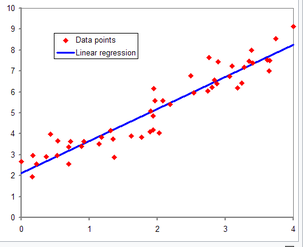

이런 그림과 같다.